In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np

In [2]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.country.value_counts()

IND    907
Name: country, dtype: int64

In [5]:
df.country_long.value_counts()

India    907
Name: country_long, dtype: int64

In [6]:
df.name.value_counts()

Panandhro Solar Power Plant      1
ATHANI SUGAR                     1
NAMRUP GT                        1
EMCO Sonurle Wind Farm           1
Ruchi Soya Palsodi Wind Farm     1
                                ..
Bamanwali Solar Power Plant      1
DOLVI ISPAT                      1
PORINGALKUTTU L                  1
Ravra - SEI Solar Power Plant    1
Gwal Pahari Solar Power Plant    1
Name: name, Length: 907, dtype: int64

In [7]:
df.gppd_idnr.value_counts()

IND0000385    1
IND0000328    1
WRI1019885    1
IND0000375    1
IND0000170    1
             ..
WRI1026207    1
IND0000215    1
IND0000358    1
WRI1026195    1
WRI1019959    1
Name: gppd_idnr, Length: 907, dtype: int64

In [8]:
df.wepp_id.value_counts()

Series([], Name: wepp_id, dtype: int64)

In [9]:
df.other_fuel2.value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [10]:
df.other_fuel3.value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [11]:
df.other_fuel1.value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [12]:
df.commissioning_year.value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [13]:
df.owner.value_counts()

Acc Acc ltd                                4
Sterling Agro Industries ltd.              4
Jk Cement ltd                              4
Karnataka Power Corporation Limited        3
Enercon India Ltd.                         3
                                          ..
Ener-t International Ltd.                  1
Moser Baer Clean Energy Limited (MBCEL)    1
Dr Ssk ltd                                 1
Gupta Ltd gepl)                            1
Reliance Ltd ril)                          1
Name: owner, Length: 280, dtype: int64

In [14]:
df.source.value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Gm Energy ltd                                  1
Jain Solar                                     1
Urja India edEnewables                         1
Vikram Vikram cement                           1
Sterling and Wilson                            1
Name: source, Length: 191, dtype: int64

In [15]:
df.url.value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.peda.gov.in/main/SPVPowerProjects.html                                     4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
https://cdm.unfccc.int/Projects/DB/BVQI1312546277.77/view                             1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1304071464.49/view                          1
http://harshaengineers.com                                                            1
http://wbpdcl.co.in                                                                   1
Name: url, Length: 304, dtype: i

In [16]:
df.latitude.value_counts()

24.1917    3
19.0004    3
15.2615    2
13.2450    2
11.5336    2
          ..
16.4994    1
9.0870     1
20.9099    1
17.2387    1
16.5973    1
Name: latitude, Length: 836, dtype: int64

In [17]:
df.longitude.value_counts()

71.6917    4
72.8983    3
81.2875    3
75.8988    3
71.6918    3
          ..
77.9576    1
91.8114    1
80.1264    1
76.1137    1
79.5748    1
Name: longitude, Length: 827, dtype: int64

In [18]:
df.estimated_generation_gwh.value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

In [19]:
df.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [20]:
df.generation_data_source.value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [21]:
df.generation_gwh_2013.value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

In [22]:
df.generation_gwh_2014.value_counts()

0.00000       28
6803.31250     1
4735.13000     1
145.81400      1
2022.57000     1
              ..
6224.00000     1
268.48085      1
1255.73200     1
164.32425      1
1153.65300     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [23]:
df.generation_gwh_2015.value_counts()

0.00000       27
174.17475      1
8076.81050     1
1.09395        1
18.71595       1
              ..
665.19730      1
1516.36010     1
741.86205      1
183.29890      1
7130.50700     1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [24]:
df.generation_gwh_2016.value_counts()

0.00000       30
8470.57000     2
1511.00000     2
250.97100      1
7.31325        1
              ..
433.84800      1
283.74811      1
259.94375      1
403.96000      1
307.87290      1
Name: generation_gwh_2016, Length: 403, dtype: int64

In [25]:
df.generation_gwh_2017.value_counts()

0.00000       32
170.08530      2
9271.00000     1
59.43135       1
549.86930      1
              ..
214.48220      1
272.73945      1
2887.00000     1
12.73600       1
158.73235      1
Name: generation_gwh_2017, Length: 408, dtype: int64

In [26]:
df.source.value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Gm Energy ltd                                  1
Jain Solar                                     1
Urja India edEnewables                         1
Vikram Vikram cement                           1
Sterling and Wilson                            1
Name: source, Length: 191, dtype: int64

In [27]:
df=df.drop(['country','country_long','name','gppd_idnr','wepp_id','other_fuel2','other_fuel3','other_fuel1','url','owner',
           'longitude','latitude','estimated_generation_gwh','year_of_capacity_data','generation_data_source',
           'commissioning_year','source'],axis=1)
df

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN
4,1800.0,Coal,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN
903,3.0,Solar,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [29]:
renew=['Solar','Hydro','Wind','Biomass']
nonrenew=['Coal','Nuclear','Oil','Gas']
df['fuel_type']=0
for i in range(len(df.primary_fuel)):
    if df.primary_fuel[i] in renew:
        df.fuel_type[i]=0
    elif df.primary_fuel[i] in nonrenew:
        df.fuel_type[i]=1

In [30]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (907, 11)


In [31]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   geolocation_source   888 non-null    object 
 3   generation_gwh_2013  0 non-null      float64
 4   generation_gwh_2014  398 non-null    float64
 5   generation_gwh_2015  422 non-null    float64
 6   generation_gwh_2016  434 non-null    float64
 7   generation_gwh_2017  440 non-null    float64
 8   generation_gwh_2018  448 non-null    float64
 9   generation_gwh_2019  0 non-null      float64
 10  fuel_type            907 non-null    int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 78.1+ KB


In [33]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [34]:
df[df['geolocation_source'].isnull()]['primary_fuel'].value_counts()

Wind     15
Solar     4
Name: primary_fuel, dtype: int64

In [35]:
df[df['primary_fuel']=='Wind']['geolocation_source'].value_counts()

WRI    108
Name: geolocation_source, dtype: int64

In [36]:
df[df['primary_fuel']=='Solar']['geolocation_source'].value_counts()

Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [37]:
for i in range(len(df['geolocation_source'])):
    if str(df['geolocation_source'][i])=='nan':
        if df['primary_fuel'][i]=='Solar':
            df['geolocation_source'][i]='Industry About'
        elif df['primary_fuel'][i]=='Wind':
            df['geolocation_source'][i]='WRI'

In [38]:
df=df.drop(['generation_gwh_2013'],axis=1)

In [39]:
df

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,fuel_type
0,2.5,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,0
1,98.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,1
2,39.2,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,0
3,135.0,Gas,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,1
4,1800.0,Coal,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,1
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,WRI,NaN,0.994875,233.596650,865.400000,686.500000,NaN,1
903,3.0,Solar,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,0
904,25.5,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,0
905,80.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,1


<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

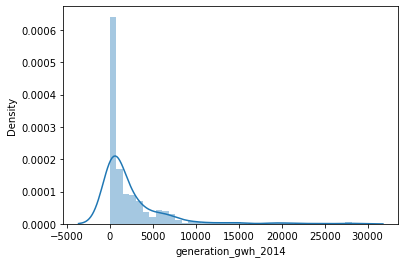

In [40]:
sn.distplot(df['generation_gwh_2014'])

In [41]:
for i in range(len(df['generation_gwh_2014'])):
    if str(df['generation_gwh_2014'][i])=='nan':
        df['generation_gwh_2014'][i]=df['generation_gwh_2014'].mean()

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

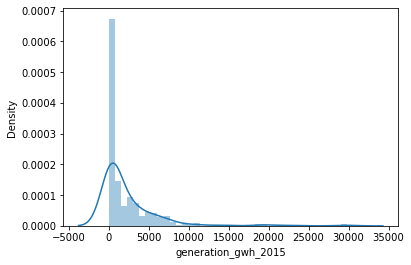

In [42]:
sn.distplot(df['generation_gwh_2015'])

In [43]:
for i in range(len(df['generation_gwh_2015'])):
    if str(df['generation_gwh_2015'][i])=='nan':
        df['generation_gwh_2015'][i]=df['generation_gwh_2015'].mean()

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

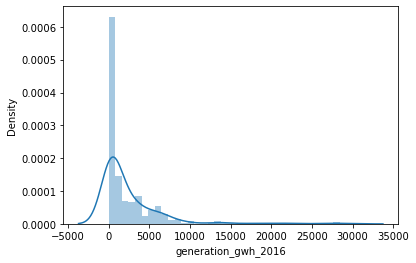

In [44]:
sn.distplot(df['generation_gwh_2016'])

In [45]:
for i in range(len(df['generation_gwh_2016'])):
    if str(df['generation_gwh_2016'][i])=='nan':
        df['generation_gwh_2016'][i]=df['generation_gwh_2016'].mean()

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

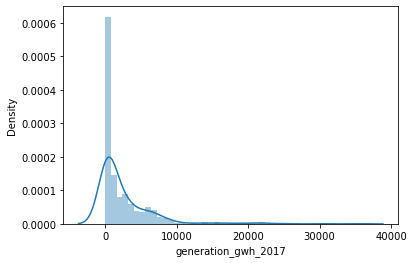

In [46]:
sn.distplot(df['generation_gwh_2017'])

In [47]:
df=df.drop(['generation_gwh_2019'],axis=1)

In [48]:
for i in range(len(df['generation_gwh_2017'])):
    if str(df['generation_gwh_2017'][i])=='nan':
        df['generation_gwh_2017'][i]=df['generation_gwh_2017'].mean()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   geolocation_source   907 non-null    object 
 3   generation_gwh_2014  907 non-null    float64
 4   generation_gwh_2015  907 non-null    float64
 5   generation_gwh_2016  907 non-null    float64
 6   generation_gwh_2017  907 non-null    float64
 7   generation_gwh_2018  448 non-null    float64
 8   fuel_type            907 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 63.9+ KB


In [50]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [51]:
dicty={}
for i in df[['primary_fuel']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'primary_fuel': {'Solar': 0,
  'Coal': 1,
  'Wind': 2,
  'Gas': 3,
  'Hydro': 4,
  'Biomass': 5,
  'Oil': 6,
  'Nuclear': 7}}

In [52]:
for i in ['primary_fuel']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [53]:
df.geolocation_source.value_counts()

WRI                                     780
Industry About                          123
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [54]:
dicty={}
for i in df[['geolocation_source']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'geolocation_source': {'National Renewable Energy Laboratory': 0,
  'WRI': 1,
  'Industry About': 2}}

In [55]:
for i in ['geolocation_source']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    int64  
 2   geolocation_source   907 non-null    int64  
 3   generation_gwh_2014  907 non-null    float64
 4   generation_gwh_2015  907 non-null    float64
 5   generation_gwh_2016  907 non-null    float64
 6   generation_gwh_2017  907 non-null    float64
 7   generation_gwh_2018  448 non-null    float64
 8   fuel_type            907 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 63.9 KB


In [57]:
df.describe()

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,fuel_type
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,448.000000,907.000000
mean,326.223755,2.368247,1.131202,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.392503
std,590.085456,1.729821,0.350633,2665.338608,2859.349132,2877.890004,2921.502193,4314.880456,0.488577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,1.000000,1.000000,1211.362750,916.000000,896.500214,882.594850,193.378250,0.000000
50%,59.200000,2.000000,1.000000,2431.823590,2428.226946,2467.936859,2547.759305,751.644375,0.000000
75%,385.250000,4.000000,1.000000,2431.823590,2428.226946,2467.936859,2547.759305,3143.535900,1.000000
max,4760.000000,7.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


In [58]:
df['fuel_type'].value_counts()

0    551
1    356
Name: fuel_type, dtype: int64

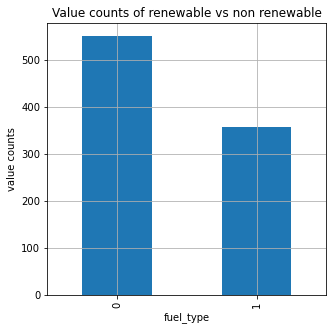

In [59]:
plt.figure(figsize=[5,5])
df['fuel_type'].value_counts().plot(kind='bar')
plt.xlabel("fuel_type")
plt.ylabel('value counts')
plt.title('Value counts of renewable vs non renewable')
plt.grid()

In [60]:
from sklearn.utils import resample
dfmin=df[df['fuel_type']==1]
dfmax=df[df['fuel_type']==0]
dfminup=resample(dfmin,replace=True,n_samples=551,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of fuel_type are:',dff['fuel_type'].value_counts()[0])
print('Number of fuel_type are:',dff['fuel_type'].value_counts()[1])
print('Unbalanced dataset' if dff['fuel_type'].value_counts()[0]!=dff['fuel_type'].value_counts()[1] else 'Balanced dataset')

Number of fuel_type are: 551
Number of fuel_type are: 551
Balanced dataset


In [61]:
dff.corr()['fuel_type']

capacity_mw            0.472232
primary_fuel          -0.281700
geolocation_source    -0.335520
generation_gwh_2014    0.207925
generation_gwh_2015    0.211337
generation_gwh_2016    0.228515
generation_gwh_2017    0.262129
generation_gwh_2018    0.357934
fuel_type              1.000000
Name: fuel_type, dtype: float64

<AxesSubplot:>

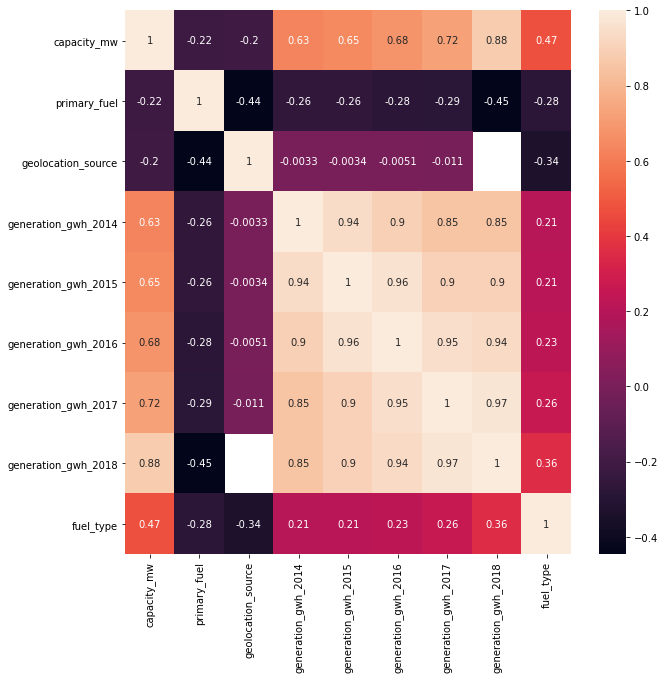

In [62]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True)

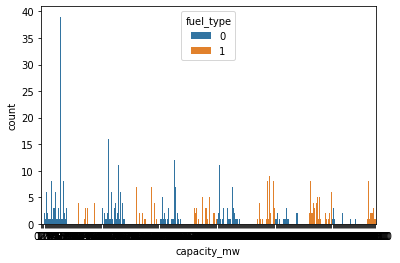

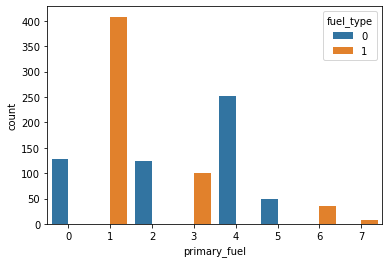

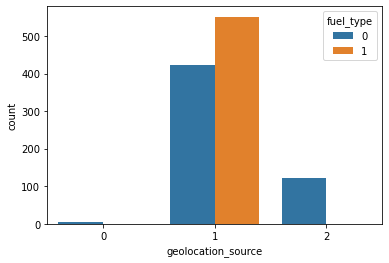

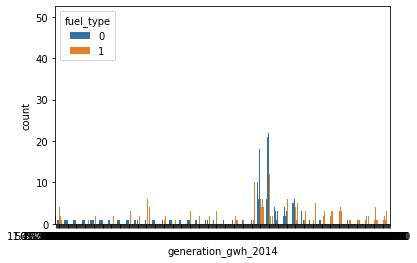

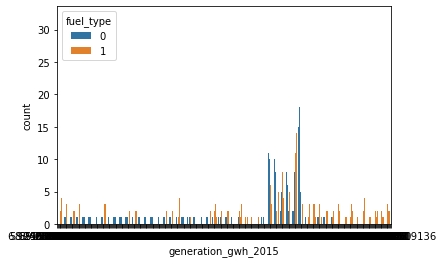

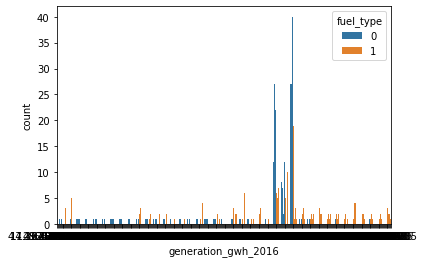

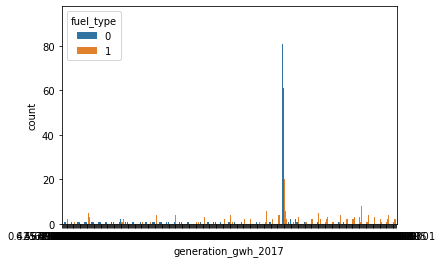

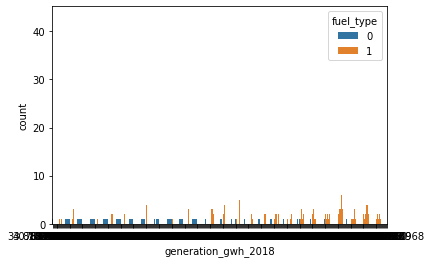

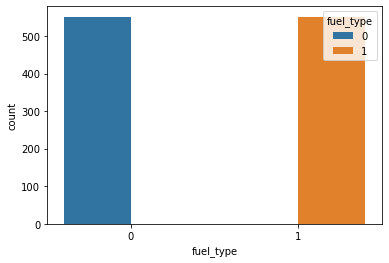

In [63]:
for i in dff.columns:
    sn.countplot(x=i,hue="fuel_type",data=dff)
    plt.show()

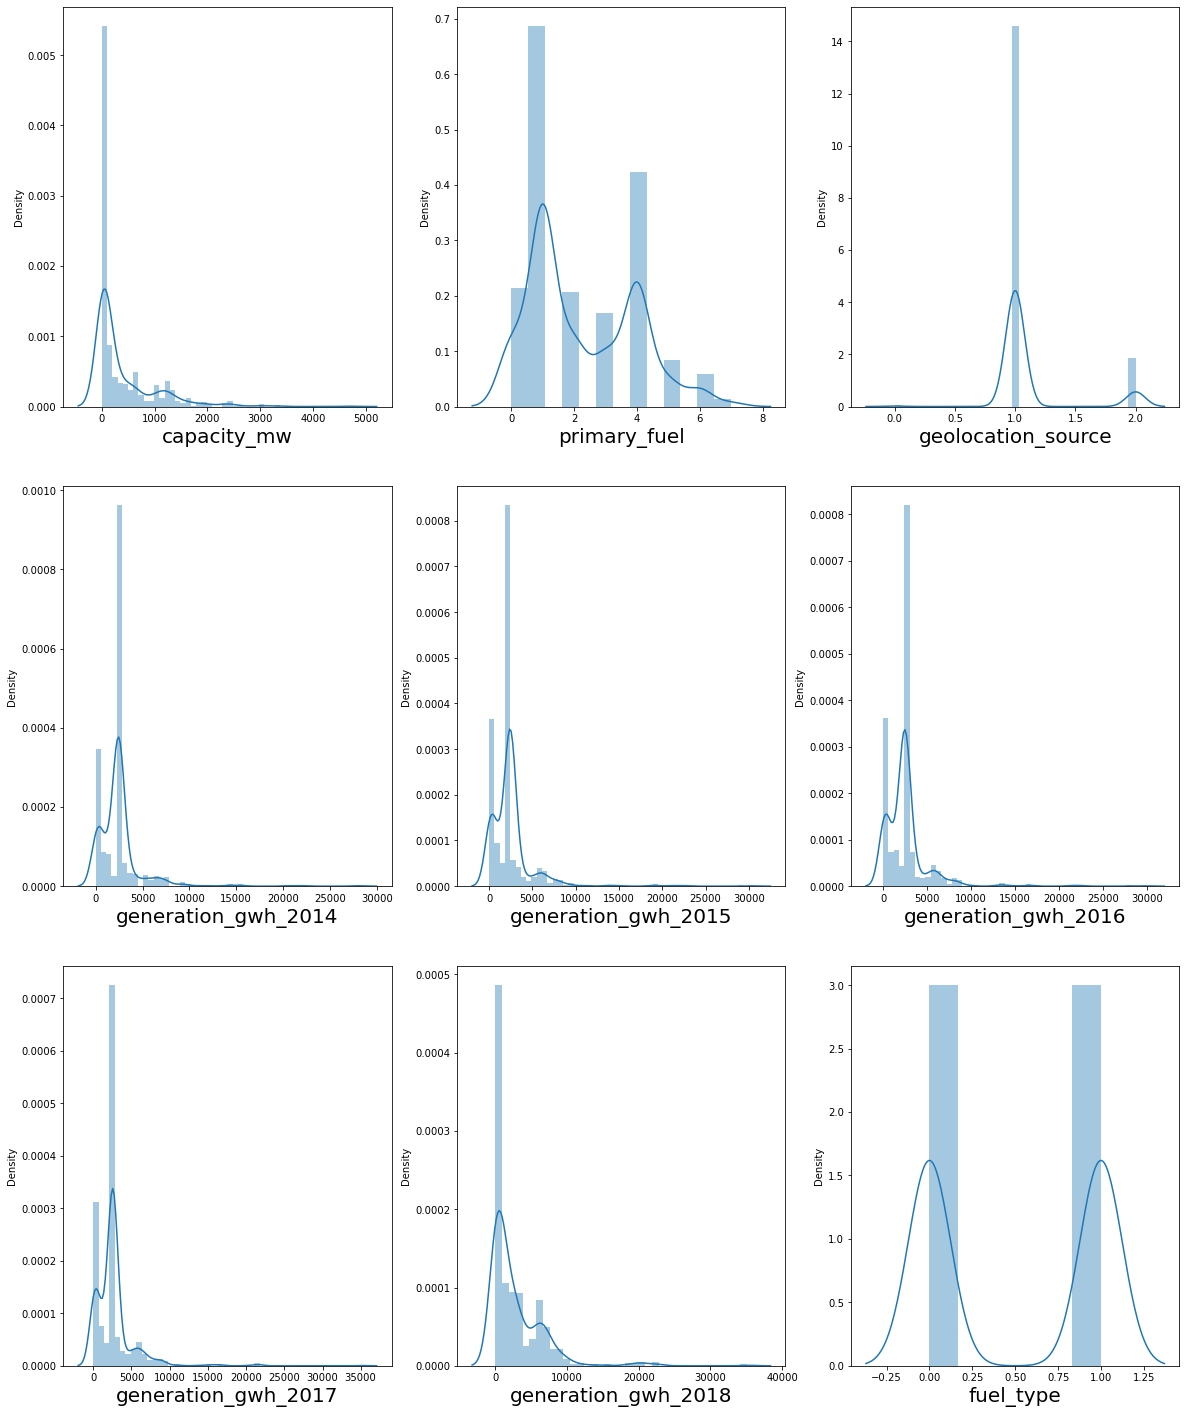

In [64]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

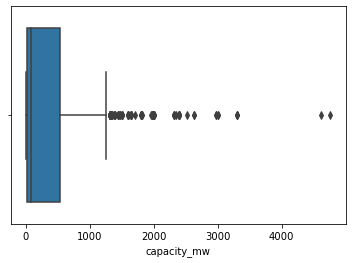

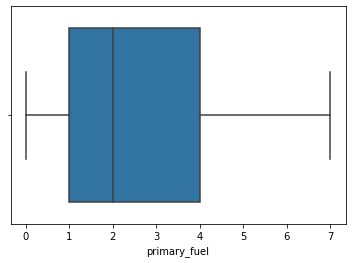

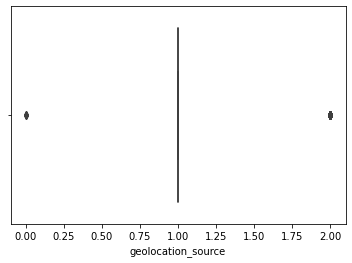

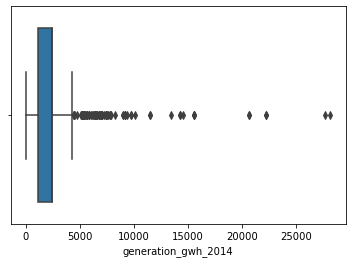

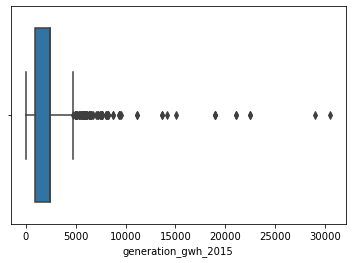

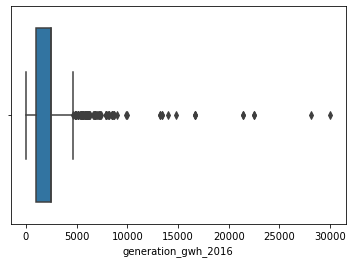

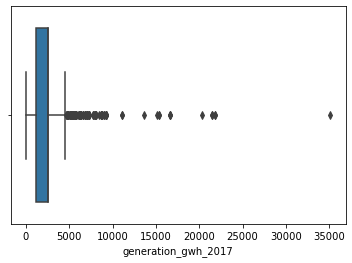

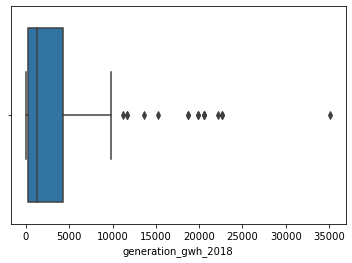

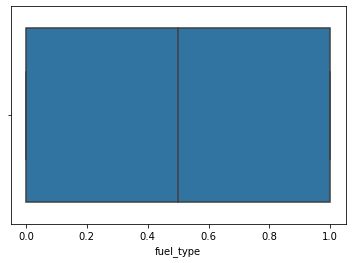

In [65]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

In [66]:
from scipy.stats import zscore
z_scr=zscore(dff)
print(dff.shape)
df_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(1102, 9)
(0, 9)


In [67]:
y = dff[['fuel_type']]
x = dff.drop(columns = ['fuel_type'])

In [68]:
x

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.50,0,0,2431.82359,2428.226946,2467.936859,2547.759305,NaN
2,39.20,2,1,2431.82359,2428.226946,2467.936859,2547.759305,NaN
6,60.00,4,1,157.55825,152.195200,61.421350,89.629600,48.32715
7,192.00,4,1,674.39110,721.335200,675.724400,679.594950,579.31885
8,290.00,4,1,480.59495,144.434200,402.029750,439.372100,406.37790
...,...,...,...,...,...,...,...,...
390,1800.00,1,1,6792.30300,6108.419000,6062.339491,6576.796000,8633.52700
290,63.50,1,1,2431.82359,2428.226946,2467.936859,2547.759305,NaN
336,350.00,3,1,792.00000,131.000000,14.107692,0.000000,0.00000
519,161.75,3,1,569.67400,487.339000,333.180000,306.396000,298.66300


In [69]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

capacity_mw            2.433378
primary_fuel           0.547727
geolocation_source     2.197769
generation_gwh_2014    4.566528
generation_gwh_2015    4.685960
generation_gwh_2016    4.426905
generation_gwh_2017    4.320531
generation_gwh_2018    2.989030
dtype: float64
7


In [70]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [71]:
#lets again check the skewness
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

capacity_mw            0.765544
primary_fuel           0.547727
geolocation_source    -2.306628
generation_gwh_2014   -0.627393
generation_gwh_2015   -0.423251
generation_gwh_2016   -0.473216
generation_gwh_2017   -0.528714
generation_gwh_2018    0.188594
dtype: float64

1


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']] = scaler.fit_transform(x[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])
x

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.209208,0,0.0,0.305328,0.317612,0.311709,0.286879,NaN
2,-0.609534,2,1.0,0.305328,0.317612,0.311709,0.286879,NaN
6,-0.457286,4,1.0,-1.426131,-1.401709,-1.698476,-1.647618,-1.163316
7,0.087806,4,1.0,-0.701326,-0.631533,-0.683822,-0.738239,-0.433298
8,0.337727,4,1.0,-0.902832,-1.421305,-0.976830,-0.988854,-0.577825
...,...,...,...,...,...,...,...,...
390,1.967979,1,1.0,1.486813,1.344524,1.303349,1.356603,1.460767
290,-0.435329,1,1.0,0.305328,0.317612,0.311709,0.286879,NaN
336,0.463611,3,1.0,-0.597455,-1.456956,-2.019751,-2.590405,-1.729823
519,-0.006400,3,1.0,-0.804538,-0.864735,-1.070940,-1.170179,-0.690217


In [73]:
x=x.fillna(0)
x

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.209208,0,0.0,0.305328,0.317612,0.311709,0.286879,0.000000
2,-0.609534,2,1.0,0.305328,0.317612,0.311709,0.286879,0.000000
6,-0.457286,4,1.0,-1.426131,-1.401709,-1.698476,-1.647618,-1.163316
7,0.087806,4,1.0,-0.701326,-0.631533,-0.683822,-0.738239,-0.433298
8,0.337727,4,1.0,-0.902832,-1.421305,-0.976830,-0.988854,-0.577825
...,...,...,...,...,...,...,...,...
390,1.967979,1,1.0,1.486813,1.344524,1.303349,1.356603,1.460767
290,-0.435329,1,1.0,0.305328,0.317612,0.311709,0.286879,0.000000
336,0.463611,3,1.0,-0.597455,-1.456956,-2.019751,-2.590405,-1.729823
519,-0.006400,3,1.0,-0.804538,-0.864735,-1.070940,-1.170179,-0.690217


In [74]:
from sklearn.decomposition import PCA
for i in range(2,8):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.8218036533367481
3 0.9335861641514388
4 0.9660081026367261
5 0.986429783434543
6 0.9941115290199323
7 0.999011998121216


In [75]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier

models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8591405306899432
roc 0.7643325143325143
diff 0.09480801635742897
**********
DecisionTreeClassifier()
score 0.9727400408580186
roc 0.9682637182637183
diff 0.004476322594300308
roc bigger
**********
KNeighborsClassifier()
score 0.9998975647692451
roc 1.0
diff 0.000102435230754927
**********
RandomForestClassifier()
score 0.9991232066579997
roc 0.9864045864045865
diff 0.012718620253413193
**********
SVC()
score 0.9811284125731266
roc 0.9681818181818183
diff 0.012946594391308297
**********
RidgeClassifier()
score 0.8578184487881882
roc 0.7687960687960689
diff 0.08902237999211937
**********
BaggingClassifier()
score 0.9985537190082645
roc 0.9773546273546273
diff 0.021199091653637203
**********
GradientBoostingClassifier()
score 0.9951008101959328
roc 0.9864455364455365
diff 0.00865527375039632
**********
SGDClassifier()
score 0.8051690616584641
roc 0.6563063063063062
diff 0.14886275535215798
**********
LGBMClassifier()
score 0.9981149596062773
roc 0.9

In [79]:
besttrain(KNeighborsClassifier(n_neighbors=4,algorithm='auto',weights='uniform'),principalComponents,y)

maximum roc_auc_score is at random state : 42  and it is : 1.0


In [80]:
parameters={"n_neighbors":list(range(1,11)),'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 80 candidates, totalling 800 fits


{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [81]:
x_train, x_test, y_train, y_test = train_test_split(principalComponents, y,random_state = 43,test_size=0.20,stratify=y)
classmodel=KNeighborsClassifier(n_neighbors=4,algorithm='auto',weights='uniform')
classmodel.fit(x_train,y_train)
y_pred=classmodel.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[111   0]
 [  0 110]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       110

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221

AUC ROC Score:  1.0
CV mean 1.0
std: 0.0


In [83]:
y_pred=classmodel.predict(principalComponents)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[550   1]
 [  0 551]]
f1 score is :  0.99909338168631
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       551
           1       1.00      1.00      1.00       551

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

AUC ROC Score:  0.999092558983666
CV mean 1.0
std: 0.0


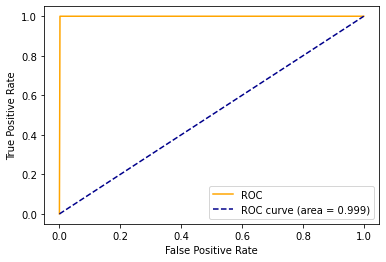

In [84]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [85]:
x['fuel_typepred']=y_pred
x['fuel_type']=y
x[['fuel_type','fuel_typepred']]

,fuel_type,fuel_typepred
0,0,0
2,0,0
6,0,0
7,0,0
8,0,0
...,...,...
390,1,1
290,1,1
336,1,1
519,1,1


In [86]:
print('Number of falsely predicted fuel_type nonrenewable',x.fuel_type.value_counts()[1]-x.fuel_typepred.value_counts()[1])

Number of falsely predicted fuel_type nonrenewable -1


In [87]:
print('Number of falsely predicted fuel_type renewable',x.fuel_typepred.value_counts()[0]-x.fuel_type.value_counts()[0])

Number of falsely predicted fuel_type renewable -1


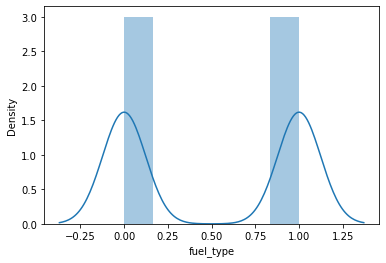

<AxesSubplot:xlabel='fuel_typepred', ylabel='Density'>

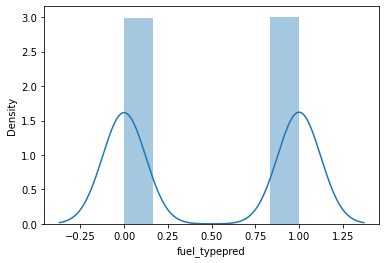

In [88]:
sn.distplot(x['fuel_type'])
plt.show()
sn.distplot(x['fuel_typepred'])

<AxesSubplot:>

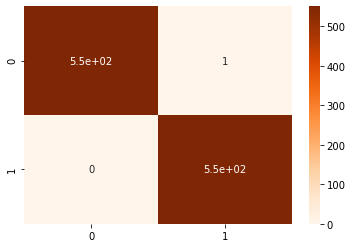

In [89]:
sn.heatmap(confusion_matrix(x['fuel_type'],x['fuel_typepred']),annot=True,cmap="Oranges",xticklabels=classmodel.classes_
               ,yticklabels=classmodel.classes_)

In [90]:
import joblib #Save model
joblib.dump(classmodel, 'fuel_type.pkl')

['fuel_type.pkl']

In [91]:
y = dff[['capacity_mw']]
x = dff.drop(columns = ['capacity_mw'])
x

,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,fuel_type
0,0,0,2431.82359,2428.226946,2467.936859,2547.759305,NaN,0
2,2,1,2431.82359,2428.226946,2467.936859,2547.759305,NaN,0
6,4,1,157.55825,152.195200,61.421350,89.629600,48.32715,0
7,4,1,674.39110,721.335200,675.724400,679.594950,579.31885,0
8,4,1,480.59495,144.434200,402.029750,439.372100,406.37790,0
...,...,...,...,...,...,...,...,...
390,1,1,6792.30300,6108.419000,6062.339491,6576.796000,8633.52700,1
290,1,1,2431.82359,2428.226946,2467.936859,2547.759305,NaN,1
336,3,1,792.00000,131.000000,14.107692,0.000000,0.00000,1
519,3,1,569.67400,487.339000,333.180000,306.396000,298.66300,1


In [92]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

primary_fuel           0.547727
geolocation_source     2.197769
generation_gwh_2014    4.566528
generation_gwh_2015    4.685960
generation_gwh_2016    4.426905
generation_gwh_2017    4.320531
generation_gwh_2018    2.989030
fuel_type              0.000000
dtype: float64
6


In [93]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [94]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

primary_fuel           0.547727
geolocation_source    -2.306628
generation_gwh_2014   -0.627393
generation_gwh_2015   -0.423251
generation_gwh_2016   -0.473216
generation_gwh_2017   -0.528714
generation_gwh_2018    0.188594
fuel_type              0.000000
dtype: float64
0


In [95]:
x

,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,fuel_type
0,0,0.0,13.447576,13.440944,13.513816,13.657969,NaN,0
2,2,1.0,13.447576,13.440944,13.513816,13.657969,NaN,0
6,4,1.0,5.401077,5.339087,3.945540,4.475248,3.642479,0
7,4,1.0,8.769415,8.968346,8.775190,8.791913,8.336285,0
8,4,1.0,7.832969,5.246746,7.380505,7.602285,7.407017,0
...,...,...,...,...,...,...,...,...
390,1,1.0,18.938214,18.280003,18.233922,18.735766,20.514586,1
290,1,1.0,13.447576,13.440944,13.513816,13.657969,NaN,1
336,3,1.0,9.252130,5.078753,2.416306,0.000000,0.000000,1
519,3,1.0,8.289763,7.869438,6.932549,6.741570,6.684370,1


In [100]:
scaler = StandardScaler()
x[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']] = scaler.fit_transform(x[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])
x=x.fillna(0)

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,2.990474,primary_fuel
1,4.261675,geolocation_source
2,3.639149,generation_gwh_2014
3,7.121339,generation_gwh_2015
4,10.251244,generation_gwh_2016
5,7.557564,generation_gwh_2017
6,6.383451,generation_gwh_2018
7,2.183509,fuel_type


In [102]:
x=x.drop(['generation_gwh_2016'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,2.967130,primary_fuel
1,4.214377,geolocation_source
2,3.633716,generation_gwh_2014
3,4.406579,generation_gwh_2015
4,6.385669,generation_gwh_2017
5,6.222504,generation_gwh_2018
6,2.164079,fuel_type


In [103]:
x=x.drop(['generation_gwh_2014'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,2.960905,primary_fuel
1,4.190726,geolocation_source
2,3.011683,generation_gwh_2015
3,6.337688,generation_gwh_2017
4,6.136231,generation_gwh_2018
5,2.147205,fuel_type


In [104]:
for i in range(2,7):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9072166922451292
3 0.9531991282453967
4 0.9875519726747716
5 0.9986065156403564
6 0.9999999999999998


In [105]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [106]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

In [108]:
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor

models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

In [109]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=3,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.8807058864840247
r2 0.855416198521749
diff 0.02528968796227571
mae 106.11112176346072
rmse 196.86652280764764
**********
NuSVR()
score 0.027244661771974044
r2 0.0705969201057437
diff 0.043352258333769655
mae 337.79950107608056
rmse 499.1304951592344
**********
LinearRegression()
score 0.49019923632456225
r2 0.2645071396799753
diff 0.22569209664458695
mae 335.9192488405896
rmse 444.01872103343123
**********
Ridge()
score 0.49016718163026013
r2 0.2652000211987653
diff 0.22496716043149484
mae 335.92032172804136
rmse 443.80952467434673
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.49016718163032413
r2 0.2652000211991721
diff 0.22496716043115206
mae 335.9203217278869
rmse 443.8095246742239
**********
BayesianRidge()
score 0.4901360212355563
r2 0.2656189575263901
diff 0.2245170637091662
mae 335.9208386625936
rmse 443.68299061988864
**********
SGDRegressor()
score 0.49514734845319547
r2 0.26561323113852153
diff 0.22953411731467394


In [110]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = GridSearchCV(XGBRegressor(), parameters,scoring="r2",cv=10,n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'max_depth': 8, 'n_estimators': 45, 'reg_lambda': 0.25}

In [111]:
besttrain(XGBRegressor(max_depth=7,n_estimators=55,reg_lambda=0.25),principalComponents,y)

44

In [112]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 44,test_size=0.20,shuffle=True)
model=XGBRegressor(max_depth=7,n_estimators=55,reg_lambda=0.25)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=3)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.952366770001507
mean absolute error: 46.361541307975806
mean squared error: 13683.774949525989
root mean square error: 116.97766859330882
cross val score 0.7386929978061904
std err 0.1951497868488923


In [113]:
dfd=pd.DataFrame(x_test)
dfd

,0,1,2
0,0.934385,1.766105,-0.226139
1,1.455694,1.041039,-0.224267
2,-1.190604,-0.547386,0.396897
3,-1.788534,0.293358,0.248706
4,6.146084,-0.512328,0.821123
...,...,...,...
216,0.351665,0.733185,0.358134
217,0.760791,0.161854,0.384028
218,-2.316803,1.027750,0.251016
219,-1.999098,-0.979052,-0.658707


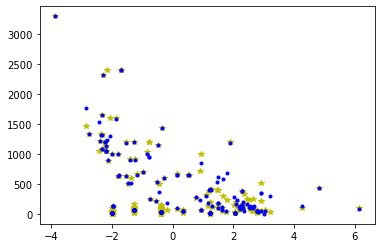

In [114]:
plt.plot(dfd[0],y_test,'y*')
plt.plot(dfd[0],y_pred,'b.')

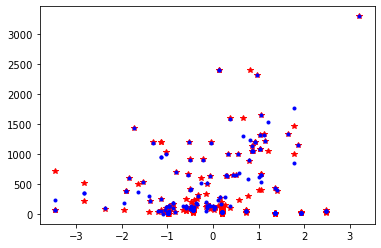

In [115]:
plt.plot(dfd[1],y_test,'r*')
plt.plot(dfd[1],y_pred,'b.')

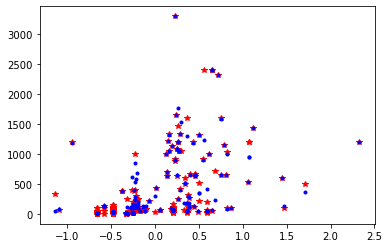

In [116]:
plt.plot(dfd[2],y_test,'r*')
plt.plot(dfd[2],y_pred,'b.')

In [118]:
y_pred=model.predict(principalComponents)
data=x
data['capacity_mwPred']=[round(i) for i in y_pred]
data['capacity_mw']=y
data['differnce']=data['capacity_mw']-data['capacity_mwPred']
data

,primary_fuel,geolocation_source,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018,fuel_type,capacity_mwPred,capacity_mw,differnce
0,0,0.0,0.317612,0.286879,0.000000,0,137,2.50,-134.50
2,2,1.0,0.317612,0.286879,0.000000,0,33,39.20,6.20
6,4,1.0,-1.401709,-1.647618,-1.163316,0,64,60.00,-4.00
7,4,1.0,-0.631533,-0.738239,-0.433298,0,171,192.00,21.00
8,4,1.0,-1.421305,-0.988854,-0.577825,0,301,290.00,-11.00
...,...,...,...,...,...,...,...,...,...
390,1,1.0,1.344524,1.356603,1.460767,1,1792,1800.00,8.00
290,1,1.0,0.317612,0.286879,0.000000,1,61,63.50,2.50
336,3,1.0,-1.456956,-2.590405,-1.729823,1,350,350.00,0.00
519,3,1.0,-0.864735,-1.170179,-0.690217,1,177,161.75,-15.25


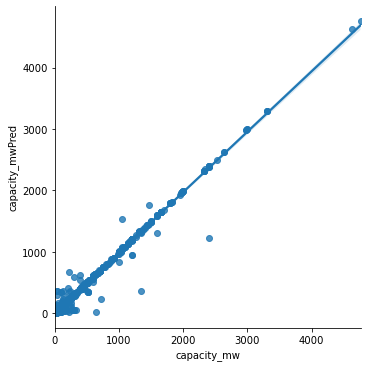

In [119]:
sn.lmplot(x='capacity_mw',y='capacity_mwPred',data=data,palette='rainbow')

<AxesSubplot:xlabel='capacity_mwPred', ylabel='Density'>

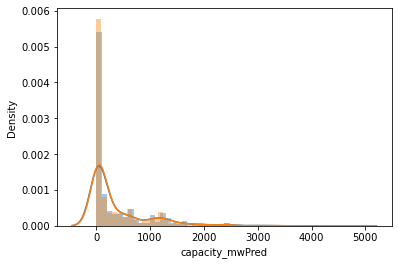

In [120]:
sn.distplot(data['capacity_mw'])
sn.distplot(data['capacity_mwPred'])

In [121]:
joblib.dump(model,'capacity_mw.pkl')

['capacity_mw.pkl']